## 빨간공 2, 파란공2, 노란공 4개를 나열하는 염주순열의 수는?
- 수업중 질문을 검증해 봄

In [11]:
import numpy as np

import itertools

In [53]:
def make_circle(colorlist):
    """입력: 색깔 8개의 각 첫글자로 이루어진 리스트
       출력: 염주로 그림.
    """
    theta = np.array([(2*np.pi/8)*i for i in range(8)])
    r = np.array([1]*8) 
    ar =np.array([400]*8) #area
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.scatter(theta, r,s=ar, c=colorlist,cmap='hsv', alpha=0.75)
    

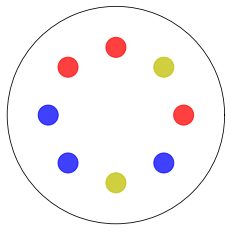

In [9]:
make_circle(['r','y','r','r','b','b','y','b'])

In [55]:
balls = 'rrbbyyyy'

In [65]:
# 같은 것이 있는 순열로 만들기
ball_perm = set(itertools.permutations(balls))

In [13]:
len(ball_perm)  #2*7*6*5=420 , 총 420개 

420

In [66]:
def next_pe(mylist):
    """한칸씩 오른쪽으로 밀기"""
    return [mylist[-1]]+mylist[:-1]

In [67]:
next_pe(['a','b','c'])

['c', 'a', 'b']

In [16]:
def dis(a,b):
    """
    입력: 두개의 리스트
    출력: 염주순열로 같으면 True, 다르면 False
    """
    temp=a[:]
    for i in range(len(a)):
#         print("temp:",temp,"b",b)
        if temp==b:
            return True
        else:
            temp = next_pe(temp)
    temp2=a[::-1]
    for j in range(len(a)):
        if temp2==b:
            return True
        else:
            temp = next_pe(temp)
    
    
    return False
            

In [68]:
dis(['a','b','c',"d"],['d','c','b','a']) # 염주순열로 같은것

True

In [69]:
dis(['a','b','d',"c"],['d','c','b','a']) # 염주순열로 다른것

False

In [71]:
ball_perm_list =list(ball_perm)
ball_perm_list2=[list(i) for i in ball_perm_list] # 리스트의 원소를 모두 리스트로 변환
ball_perm_list2[0]


['y', 'y', 'r', 'b', 'r', 'y', 'y', 'b']

In [24]:
def diff(first, second):
#         리스트의 차이를 리스트로 만들어 출력, 마치 차집합 처럼.
        return [item for item in first if item not in second]

In [29]:
def makelist(mylist):
    """입력 :리스트
    리스트의 첫번째 원소와 동치류에 있는 것들을 리스트A로 만듦. 
    그리고 이 리스트를 원래 리스트에서 제외한 리스트B를 만듦.
    출력: B, A"""
    listA, listB=[],[]
    first_el=mylist[0]
    listA.append(first_el)
    for i in mylist[1:]:
        if dis(i,first_el):
            listA.append(i)
    listB = diff(mylist,listA)
    return listB,listA

In [32]:
makelist(ball_perm_list2)[1]

[['y', 'y', 'r', 'b', 'r', 'y', 'y', 'b'],
 ['r', 'y', 'y', 'b', 'y', 'y', 'r', 'b'],
 ['y', 'y', 'b', 'y', 'y', 'r', 'b', 'r'],
 ['y', 'r', 'b', 'r', 'y', 'y', 'b', 'y'],
 ['b', 'r', 'y', 'y', 'b', 'y', 'y', 'r'],
 ['r', 'b', 'r', 'y', 'y', 'b', 'y', 'y'],
 ['b', 'y', 'y', 'r', 'b', 'r', 'y', 'y'],
 ['y', 'b', 'y', 'y', 'r', 'b', 'r', 'y']]

In [42]:
myresult={} # index: 염주순열로 같은 것끼리 모은 리스트
mynum ={}   # index: 같은 것의 개수
temp = ball_perm_list2

for i in range(1,420):
    try:
        print("{}:{}".format(i,makelist(temp)[1]))
        myresult[i]= makelist(temp)[1]
        mynum[i]= len(makelist(temp)[1])
        temp = makelist(temp)[0]
    except:
        break
    
    
    
    

1:[['y', 'y', 'r', 'b', 'r', 'y', 'y', 'b'], ['r', 'y', 'y', 'b', 'y', 'y', 'r', 'b'], ['y', 'y', 'b', 'y', 'y', 'r', 'b', 'r'], ['y', 'r', 'b', 'r', 'y', 'y', 'b', 'y'], ['b', 'r', 'y', 'y', 'b', 'y', 'y', 'r'], ['r', 'b', 'r', 'y', 'y', 'b', 'y', 'y'], ['b', 'y', 'y', 'r', 'b', 'r', 'y', 'y'], ['y', 'b', 'y', 'y', 'r', 'b', 'r', 'y']]
2:[['y', 'b', 'r', 'y', 'b', 'y', 'y', 'r'], ['b', 'r', 'y', 'b', 'y', 'y', 'r', 'y'], ['r', 'y', 'b', 'r', 'y', 'b', 'y', 'y'], ['b', 'y', 'y', 'r', 'y', 'b', 'r', 'y'], ['y', 'b', 'y', 'y', 'r', 'y', 'b', 'r'], ['y', 'r', 'y', 'b', 'r', 'y', 'b', 'y'], ['y', 'y', 'r', 'y', 'b', 'r', 'y', 'b'], ['r', 'y', 'b', 'y', 'y', 'r', 'y', 'b'], ['r', 'y', 'y', 'b', 'y', 'r', 'b', 'y']]
3:[['y', 'b', 'b', 'y', 'r', 'y', 'y', 'r'], ['r', 'y', 'y', 'r', 'y', 'b', 'b', 'y'], ['y', 'r', 'y', 'y', 'r', 'y', 'b', 'b'], ['y', 'y', 'r', 'y', 'b', 'b', 'y', 'r'], ['b', 'y', 'r', 'y', 'y', 'r', 'y', 'b'], ['r', 'y', 'b', 'b', 'y', 'r', 'y', 'y'], ['b', 'b', 'y', 'r', 'y',

31:[['r', 'b', 'y', 'y', 'r', 'b', 'y', 'y'], ['y', 'r', 'b', 'y', 'y', 'r', 'b', 'y'], ['b', 'y', 'y', 'r', 'b', 'y', 'y', 'r'], ['y', 'y', 'r', 'b', 'y', 'y', 'r', 'b'], ['y', 'y', 'b', 'r', 'y', 'y', 'b', 'r']]
32:[['y', 'y', 'r', 'b', 'r', 'b', 'y', 'y'], ['y', 'r', 'b', 'r', 'b', 'y', 'y', 'y'], ['y', 'y', 'y', 'y', 'r', 'b', 'r', 'b'], ['b', 'y', 'y', 'y', 'y', 'r', 'b', 'r'], ['r', 'b', 'y', 'y', 'y', 'y', 'r', 'b'], ['b', 'r', 'b', 'y', 'y', 'y', 'y', 'r'], ['y', 'y', 'y', 'r', 'b', 'r', 'b', 'y']]
33:[['y', 'y', 'y', 'r', 'r', 'b', 'b', 'y'], ['r', 'r', 'b', 'b', 'y', 'y', 'y', 'y'], ['b', 'b', 'y', 'y', 'y', 'y', 'r', 'r'], ['y', 'y', 'r', 'r', 'b', 'b', 'y', 'y'], ['r', 'b', 'b', 'y', 'y', 'y', 'y', 'r'], ['b', 'y', 'y', 'y', 'y', 'r', 'r', 'b'], ['y', 'y', 'y', 'y', 'r', 'r', 'b', 'b']]
34:[['y', 'b', 'y', 'b', 'r', 'r', 'y', 'y'], ['y', 'y', 'y', 'b', 'y', 'b', 'r', 'r'], ['r', 'y', 'y', 'y', 'b', 'y', 'b', 'r'], ['r', 'r', 'y', 'y', 'y', 'b', 'y', 'b'], ['y', 'b', 'r', 'r

In [44]:
mynum

{1: 8,
 2: 9,
 3: 8,
 4: 9,
 5: 9,
 6: 9,
 7: 7,
 8: 9,
 9: 9,
 10: 9,
 11: 9,
 12: 7,
 13: 9,
 14: 9,
 15: 8,
 16: 9,
 17: 9,
 18: 9,
 19: 7,
 20: 9,
 21: 9,
 22: 7,
 23: 9,
 24: 8,
 25: 7,
 26: 7,
 27: 8,
 28: 9,
 29: 8,
 30: 8,
 31: 5,
 32: 7,
 33: 7,
 34: 7,
 35: 3,
 36: 9,
 37: 7,
 38: 4,
 39: 7,
 40: 7,
 41: 7,
 42: 9,
 43: 8,
 44: 7,
 45: 8,
 46: 8,
 47: 7,
 48: 7,
 49: 7,
 50: 8,
 51: 7,
 52: 7,
 53: 9,
 54: 7}

**결과해석**: 총 54개의 염주순열을 가진다. 이때 원래 직순열에서 3개,4개, 5개, 7개, 8개, 9개가 하나의 염주순열로 바뀐다.

In [57]:
mynum.values()

dict_values([8, 9, 8, 9, 9, 9, 7, 9, 9, 9, 9, 7, 9, 9, 8, 9, 9, 9, 7, 9, 9, 7, 9, 8, 7, 7, 8, 9, 8, 8, 5, 7, 7, 7, 3, 9, 7, 4, 7, 7, 7, 9, 8, 7, 8, 8, 7, 7, 7, 8, 7, 7, 9, 7])

In [58]:
from collections import Counter
Counter(_)

Counter({8: 11, 9: 20, 7: 20, 5: 1, 3: 1, 4: 1})

**결과해석**: 8개 묶음이 11개, 9개 묶음이 20개... 

In [45]:
sum(mynum.values())

420

In [46]:
myresult

{1: [['y', 'y', 'r', 'b', 'r', 'y', 'y', 'b'],
  ['r', 'y', 'y', 'b', 'y', 'y', 'r', 'b'],
  ['y', 'y', 'b', 'y', 'y', 'r', 'b', 'r'],
  ['y', 'r', 'b', 'r', 'y', 'y', 'b', 'y'],
  ['b', 'r', 'y', 'y', 'b', 'y', 'y', 'r'],
  ['r', 'b', 'r', 'y', 'y', 'b', 'y', 'y'],
  ['b', 'y', 'y', 'r', 'b', 'r', 'y', 'y'],
  ['y', 'b', 'y', 'y', 'r', 'b', 'r', 'y']],
 2: [['y', 'b', 'r', 'y', 'b', 'y', 'y', 'r'],
  ['b', 'r', 'y', 'b', 'y', 'y', 'r', 'y'],
  ['r', 'y', 'b', 'r', 'y', 'b', 'y', 'y'],
  ['b', 'y', 'y', 'r', 'y', 'b', 'r', 'y'],
  ['y', 'b', 'y', 'y', 'r', 'y', 'b', 'r'],
  ['y', 'r', 'y', 'b', 'r', 'y', 'b', 'y'],
  ['y', 'y', 'r', 'y', 'b', 'r', 'y', 'b'],
  ['r', 'y', 'b', 'y', 'y', 'r', 'y', 'b'],
  ['r', 'y', 'y', 'b', 'y', 'r', 'b', 'y']],
 3: [['y', 'b', 'b', 'y', 'r', 'y', 'y', 'r'],
  ['r', 'y', 'y', 'r', 'y', 'b', 'b', 'y'],
  ['y', 'r', 'y', 'y', 'r', 'y', 'b', 'b'],
  ['y', 'y', 'r', 'y', 'b', 'b', 'y', 'r'],
  ['b', 'y', 'r', 'y', 'y', 'r', 'y', 'b'],
  ['r', 'y', 'b', 'b'

In [48]:
myresult[1] 

[['y', 'y', 'r', 'b', 'r', 'y', 'y', 'b'],
 ['r', 'y', 'y', 'b', 'y', 'y', 'r', 'b'],
 ['y', 'y', 'b', 'y', 'y', 'r', 'b', 'r'],
 ['y', 'r', 'b', 'r', 'y', 'y', 'b', 'y'],
 ['b', 'r', 'y', 'y', 'b', 'y', 'y', 'r'],
 ['r', 'b', 'r', 'y', 'y', 'b', 'y', 'y'],
 ['b', 'y', 'y', 'r', 'b', 'r', 'y', 'y'],
 ['y', 'b', 'y', 'y', 'r', 'b', 'r', 'y']]

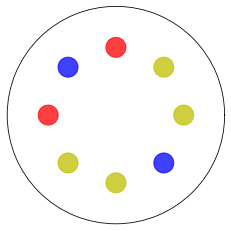

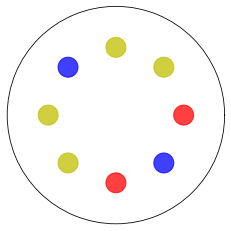

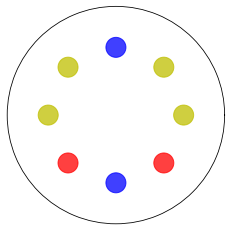

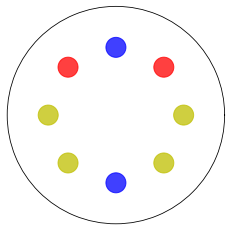

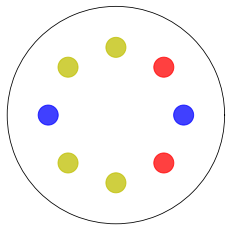

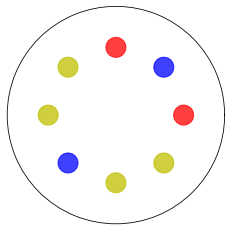

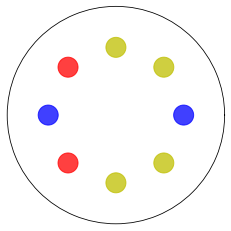

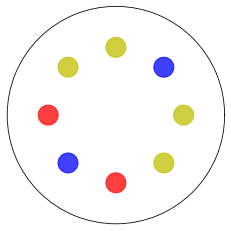

In [51]:
for j,i in enumerate(myresult[1],1):

    make_circle(i)

In [62]:
# 서로다른 54개 출력
for j,i in enumerate(myresult.values(),1):
    print(j,i[0])

1 ['y', 'y', 'r', 'b', 'r', 'y', 'y', 'b']
2 ['y', 'b', 'r', 'y', 'b', 'y', 'y', 'r']
3 ['y', 'b', 'b', 'y', 'r', 'y', 'y', 'r']
4 ['b', 'y', 'r', 'b', 'r', 'y', 'y', 'y']
5 ['r', 'y', 'b', 'y', 'y', 'y', 'b', 'r']
6 ['y', 'b', 'b', 'r', 'y', 'y', 'y', 'r']
7 ['r', 'b', 'b', 'y', 'r', 'y', 'y', 'y']
8 ['r', 'y', 'b', 'r', 'y', 'y', 'y', 'b']
9 ['y', 'y', 'y', 'b', 'b', 'r', 'r', 'y']
10 ['y', 'b', 'r', 'r', 'y', 'y', 'b', 'y']
11 ['y', 'y', 'r', 'b', 'y', 'r', 'y', 'b']
12 ['y', 'r', 'b', 'y', 'r', 'y', 'y', 'b']
13 ['y', 'b', 'b', 'y', 'y', 'r', 'y', 'r']
14 ['y', 'b', 'y', 'y', 'r', 'r', 'y', 'b']
15 ['b', 'r', 'y', 'r', 'b', 'y', 'y', 'y']
16 ['y', 'r', 'y', 'r', 'b', 'y', 'y', 'b']
17 ['y', 'r', 'y', 'b', 'r', 'b', 'y', 'y']
18 ['y', 'y', 'y', 'y', 'b', 'r', 'b', 'r']
19 ['r', 'y', 'b', 'r', 'y', 'y', 'b', 'y']
20 ['b', 'y', 'b', 'r', 'y', 'y', 'r', 'y']
21 ['y', 'r', 'y', 'y', 'b', 'y', 'b', 'r']
22 ['y', 'b', 'y', 'r', 'r', 'b', 'y', 'y']
23 ['y', 'b', 'y', 'y', 'y', 'r', 'r', 'b

/Users/xzero/python_ex/basic_statistics/statvenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


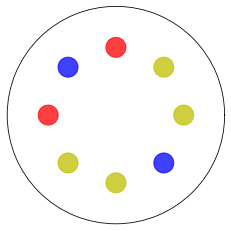

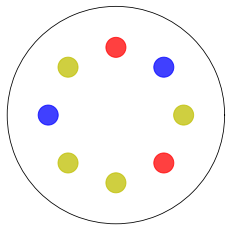

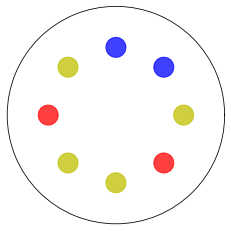

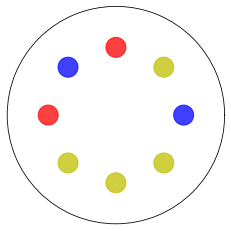

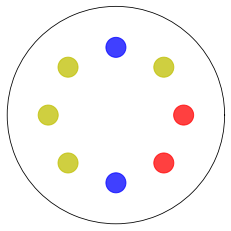

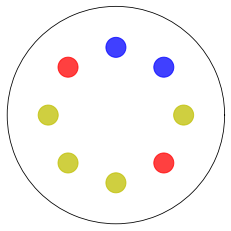

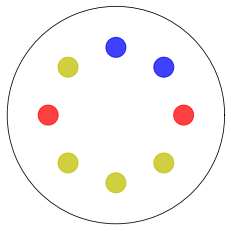

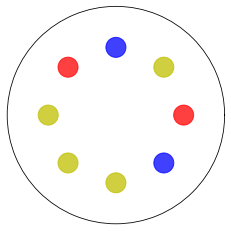

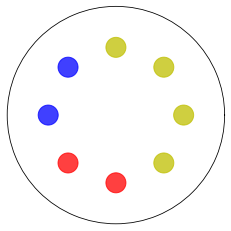

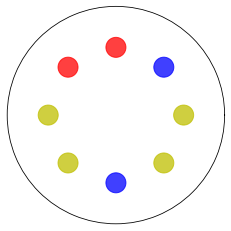

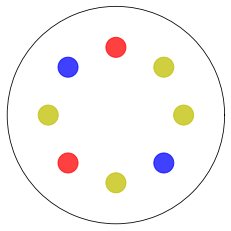

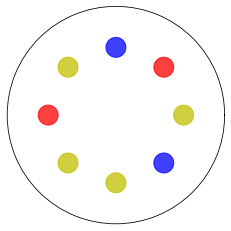

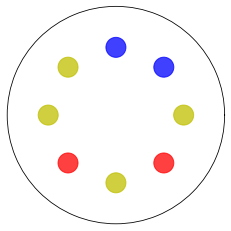

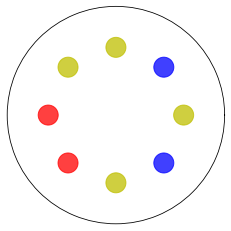

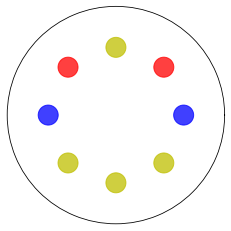

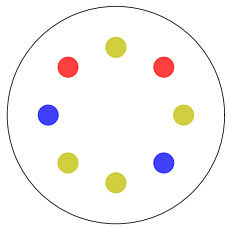

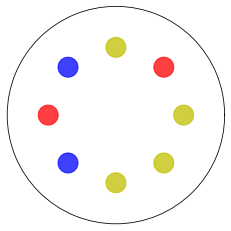

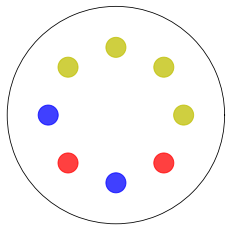

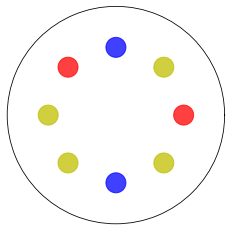

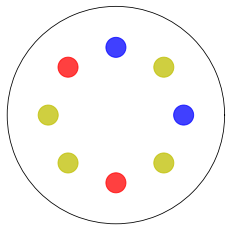

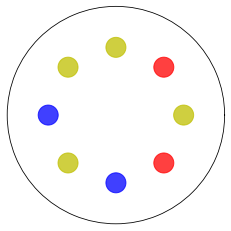

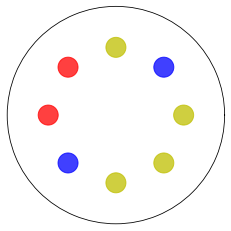

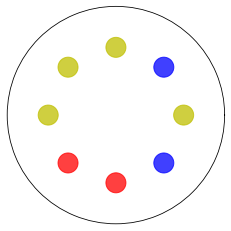

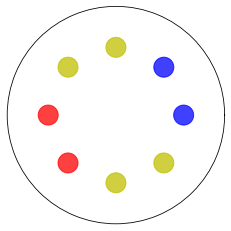

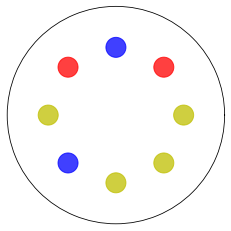

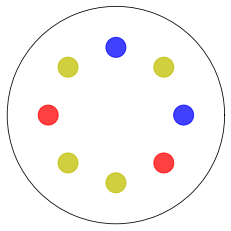

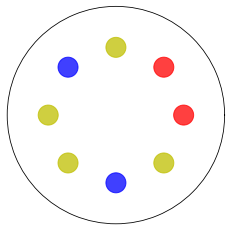

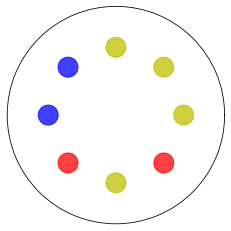

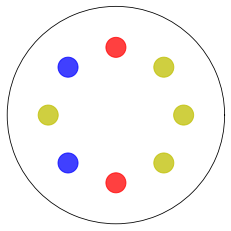

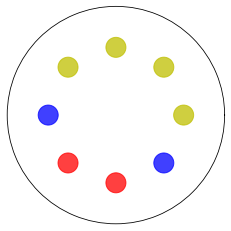

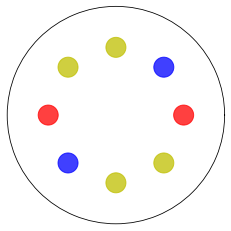

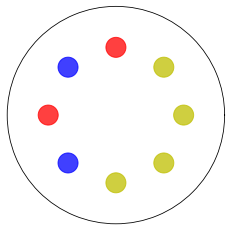

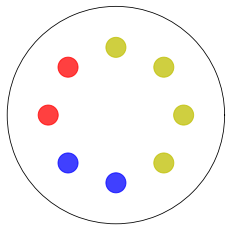

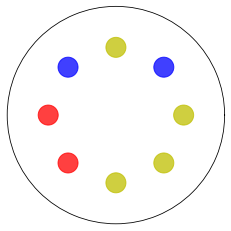

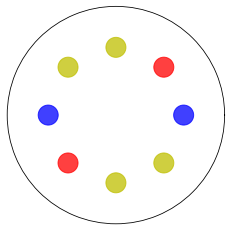

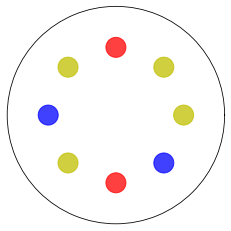

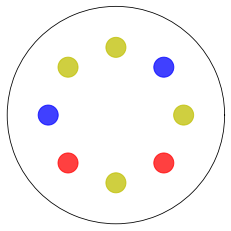

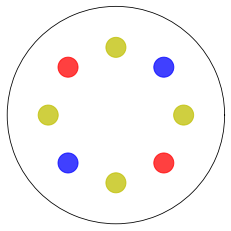

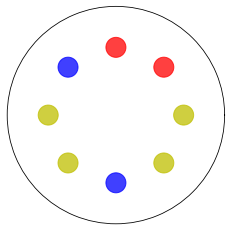

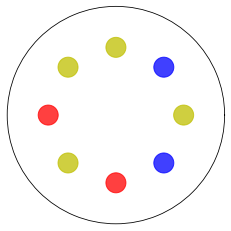

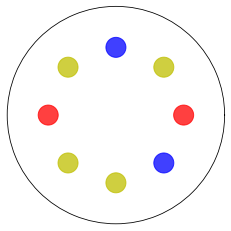

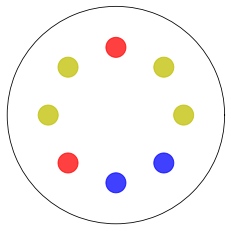

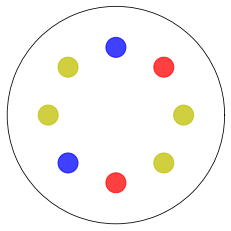

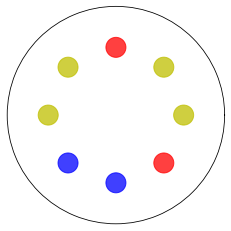

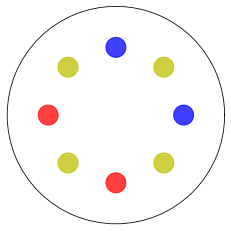

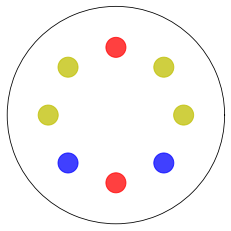

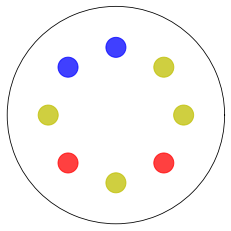

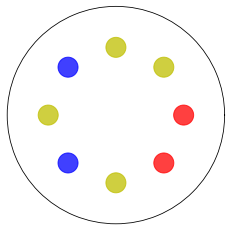

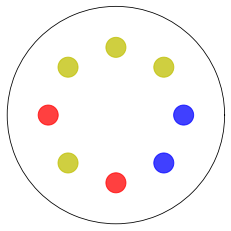

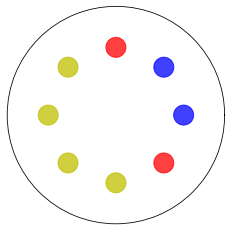

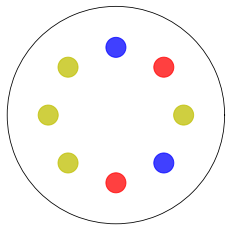

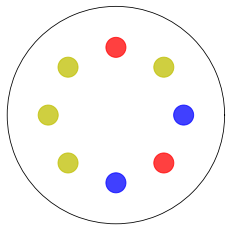

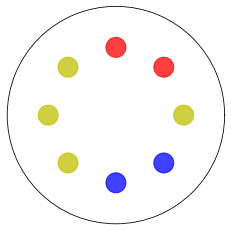

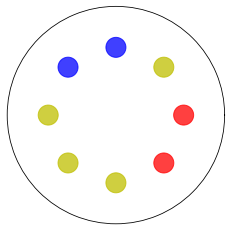

In [64]:
# 서로다른 54개 그림, 출력
for j,i in enumerate(myresult.values(),1):
    make_circle(i[0])